In [50]:
import numpy as np
from pathlib import Path
from pymatreader import read_mat
from collections import Counter

import mne

%matplotlib qt

# base path for biomag 2022 challenge
#base_path = Path('/storage/store/data/biomag_challenge/Biomag2022/biomag_hokuto')
base_path = Path('.')

### Create info from .mat

In [19]:
info_path = base_path / 'traininig/control/control_01_25/hokuto_control10.mat'
infos = read_mat(info_path)
infos = infos['D']
print(infos.keys())
sfreq = infos['Fsample']

print(infos['data'])
data_fname = infos['data']['fname']
print(f"Data file name: {data_fname}")

dict_keys(['type', 'Nsamples', 'Fsample', 'timeOnset', 'trials', 'channels', 'data', 'fname', 'path', 'sensors', 'fiducials', 'transform', 'condlist', 'montage'])
{'fname': 'R:\\biomag\\training\\control\\hokuto_control10.dat', 'dim': array([   186, 600000], dtype=int32), 'dtype': 16, 'be': 0, 'offset': 0, 'pos': array([1, 1], dtype=uint8), 'scl_slope': array([], dtype=uint8), 'scl_inter': array([], dtype=uint8), 'permission': 'rw'}
Data file name: R:\biomag\training\control\hokuto_control10.dat


In [42]:
# sensor_position = data['sensors']
# fiducials = data['fiducials']
print(infos['channels'].keys())
ch_names = infos['channels']['label']
ch_types = infos['channels']['type']
print(Counter(ch_types))
# correspondance dict for channel types
type_dict = {'MEGGRAD': 'grad',
             'Other'  : 'misc',
             'REFMAG' : 'ref_meg'}
ch_types = [type_dict[ch] for ch in ch_types]

dict_keys(['bad', 'label', 'type', 'X_plot2D', 'Y_plot2D', 'units'])
Counter({'MEGGRAD': 160, 'Other': 14, 'REFMAG': 12})


In [20]:
info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)
info

<Info | 7 non-empty values
 bads: []
 ch_names: AG001, AG002, AG003, AG004, AG005, AG006, AG007, AG008, AG009, ...
 chs: 186 Reference Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: unspecified
 nchan: 186
 projs: []
 sfreq: 2000.0 Hz
>

### Load data from .dat and create MNE.raw object

In [49]:
#data_path = '/storage/store/data/biomag_challenge/Biomag2022/biomag_hokuto/traininig/control/control_01_25/hokuto_control10.dat'
data_path = Path(str(info_path).replace('mat', 'dat'))
data = np.fromfile(data_path, dtype="float32")  # Ca doit pas etre le bon dtype
n_ch, n_times = len(ch_types), infos['Nsamples']
data = np.reshape(data, (n_ch, n_times))
data

array([[-4443.785  , -4204.7305 , -4395.9204 , ..., -3786.7505 ,
        -2098.8523 , -4531.44   ],
       [-4106.4497 , -2329.3535 , -1651.8077 , ..., -5962.158  ,
        -6726.8115 , -2643.7424 ],
       [-1332.9156 , -3716.7415 , -2722.169  , ..., -5460.9097 ,
        -3367.0505 , -2757.7808 ],
       ...,
       [-3425.069  , -2716.814  , -3406.7124 , ..., -4777.2075 ,
        -4334.05   , -4992.6733 ],
       [-4525.643  , -4132.7383 , -3393.494  , ..., -3031.4797 ,
        -2416.2246 , -4602.6    ],
       [-4540.951  , -5290.8423 , -3797.3079 , ...,  -322.86914,
         -248.91797,  -340.66992]], dtype=float32)

Creating RawArray with float64 data, n_channels=186, n_times=600000
    Range : 0 ... 599999 =      0.000 ...   300.000 secs
Ready.
Using matplotlib as 2D backend.
Opening raw-browser...


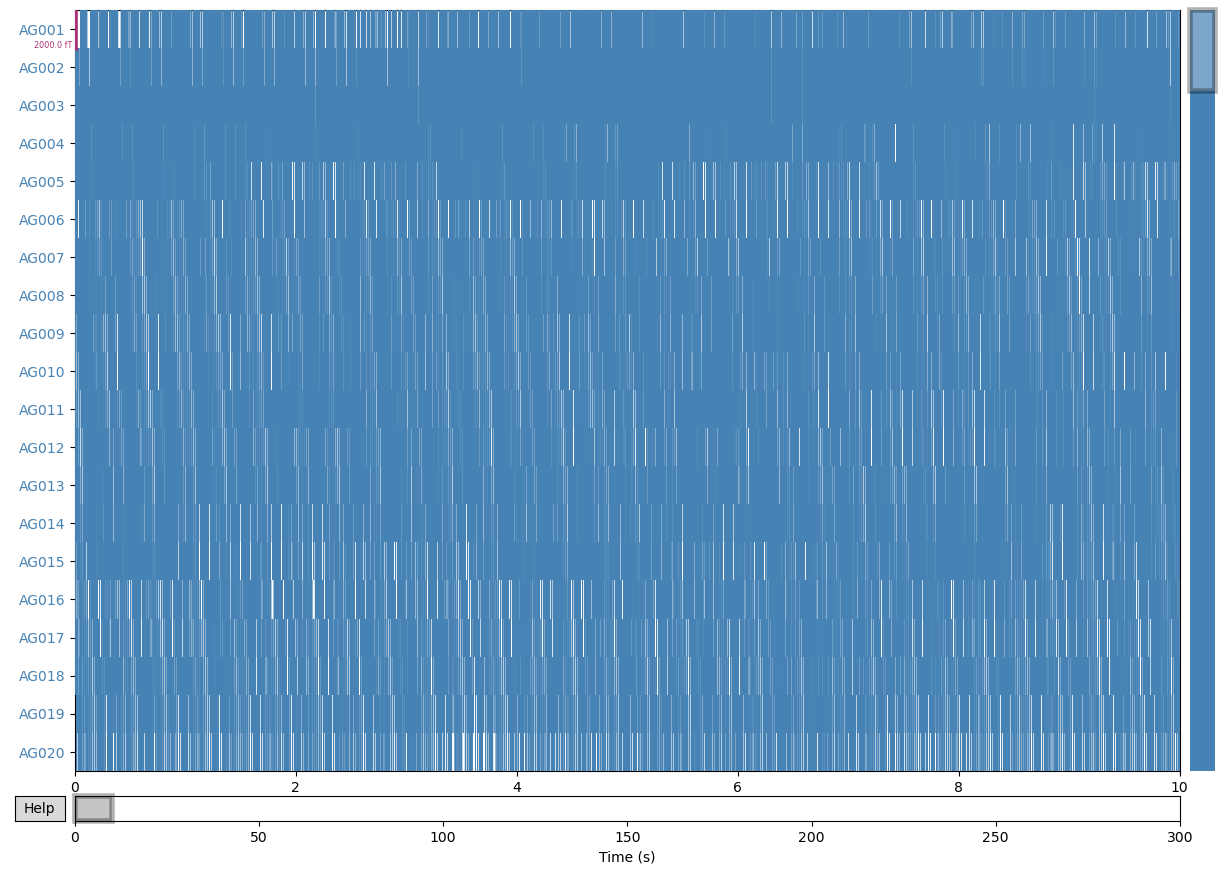

Closing raw-browser...
Channels marked as bad:
none


In [51]:
raw = mne.io.RawArray(data, info)
raw.plot();

Using qt as 2D backend.
Opening raw-browser...
Free RAM space could not be determined because"psutil" is not installed. Setting precompute to False.


KeyError: 'figure.raise_window'

Closing raw-browser...
Channels marked as bad:
none
Closing raw-browser...
Channels marked as bad:
none
Closing raw-browser...
Channels marked as bad:
none
